#### The code starts by importing various libraries and modules necessary for data preprocessing, data analysis, and different machine learning regression models.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
%matplotlib inline

#### This is the path file of the dataset where we importing dataset

In [2]:
import io
%cd C:\Users\KHALEELBASHA\Desktop\pga30 rajesh sir\BigMArt SAles

C:\Users\KHALEELBASHA\Desktop\pga30 rajesh sir\BigMArt SAles


#### This code reads the training and test datasets from CSV files. The training dataset (salestrain) contains the target variable, and the test dataset (salestest) does not. The goal is to build models on the training data and make predictions for the test data.

In [3]:
salestrain=pd.read_csv("train_v9rqX0R.csv")

In [4]:
salestest=pd.read_csv("test_AbJTz2l.csv")

### These lines provide an initial exploration of the datasets by displaying their shapes (number of rows and columns) and using the info() method to check for missing values and data types.

In [5]:
print(salestrain.shape)
print(salestest.shape)

(8523, 12)
(5681, 11)


In [6]:
salestrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
salestest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


#### This part of the code, a temporary dependent variable is added to the test dataset for preprocessing purposes. It is set to "test" to indicate that this is the dataset for which predictions will be made.

In [8]:
salestest['Item_Outlet_Sales']='test'

#### The code combines both the training and test datasets into a single dataframe called combinedf. 
#### This is often done for consistent preprocessing steps that need to be applied to both datasets.
#### For Concatenation of 2 dataframes the number of variables and squence of variables must besame.

In [9]:
combinedf=pd.concat([salestrain,salestest],axis=0)
# axis=0 is Row wise Concatenation
# axis=1 is Column wise Concatenation

In [10]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 1.4+ MB


In [11]:
combinedf.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,test
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,test
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,test
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,test


In [12]:
combinedf.Item_Weight.describe()
# Numeric Varible - Mean or Median Imputation can be done

count    11765.000000
mean        12.792854
std          4.652502
min          4.555000
25%          8.710000
50%         12.600000
75%         16.750000
max         21.350000
Name: Item_Weight, dtype: float64

#### Missing values are imputed in the 'Item_Weight' column using the mean of the column. In the 'Outlet_Size' column, missing values are replaced with the string 'Missing'.

In [13]:
# Mean Imputation
combinedf.Item_Weight=combinedf.Item_Weight.fillna(combinedf.Item_Weight.mean())

In [14]:
combinedf.Outlet_Size.value_counts(dropna=False)

Medium    4655
NaN       4016
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [15]:
# Since missing values are very and cannot be imputed with existing levels, impute with word
# missing
combinedf.Outlet_Size=combinedf.Outlet_Size.fillna("Missing")

In [16]:
combinedf.Item_Fat_Content.value_counts(dropna=False) # Duplicate Levels/Groups

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [17]:
combinedf.Item_Fat_Content=combinedf.Item_Fat_Content.replace(['LF','low fat'],'Low Fat')

In [18]:
combinedf.Item_Fat_Content=combinedf.Item_Fat_Content.replace('reg','Regular')

In [19]:
# Split Data into numeric cols and object cols
numcols=combinedf.select_dtypes(include=np.number)
objcols=combinedf.select_dtypes(include=['object'])

In [20]:
numcols.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')

In [21]:
objcols.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [22]:
for col in objcols.columns[1:7]:
    freq=objcols[col].value_counts(dropna=False)
    print(freq)

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64
Medium     4655
Missing    4016
Small      3980
High       1553
Name: Outlet_Size, dtype: int64
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
Supermarket Type1    9294
Grocery Store        1805

In [23]:
objcols.Item_Identifier.head(10)

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
5    FDP36
6    FDO10
7    FDP10
8    FDH17
9    FDU28
Name: Item_Identifier, dtype: object

In [24]:
# Function with name
def addition(x1,x2):
    addition=x1+x2
    return addition

In [25]:
x1=2
x2=3
addition(x1,x2)

5

In [26]:
# Function without name 
sum=lambda x1,x2:x1+x2
print(sum(2,3))

5


#### A new variable 'Item_Code' is created by extracting the first two characters from the 'Item_Identifier' column. 
#### This transformation helps to categorize items based on their codes.

In [27]:
# Created a New Variable called Item_Code which is extraction of first 2 characters of 
# Item_Identifier
objcols['Item_Code']=objcols.Item_Identifier.apply(lambda x:x[0:2])

In [28]:
objcols.Item_Code.value_counts(dropna=False) # FD - Food, DR-Drinks & NC - Non-Consumable

FD    10201
NC     2686
DR     1317
Name: Item_Code, dtype: int64

In [29]:
# Create a new variable "Outlet_Age" from Outlet_Establishment_Year 
numcols["Outlet_Age"]=2022-numcols.Outlet_Establishment_Year

In [30]:
numcols.Outlet_Age.describe()

count    14204.000000
mean        24.169319
std          8.371664
min         13.000000
25%         18.000000
50%         23.000000
75%         35.000000
max         37.000000
Name: Outlet_Age, dtype: float64

In [31]:
numcols.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Age'],
      dtype='object')

In [32]:
numcols=numcols.drop('Outlet_Establishment_Year',axis=1)
# axis=1 is Column dropping

In [33]:
numcols.head() # Variables are in different unit sizes - Scaling mut be done

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,9.30,0.016047,249.8092,23
1,5.92,0.019278,48.2692,13
2,17.50,0.016760,141.6180,23
3,19.20,0.000000,182.0950,24
4,8.93,0.000000,53.8614,35


#### The numeric columns are standardized using the StandardScaler. 
#### This scales the data so that it has a mean of 0 and a standard deviation of 1.

In [34]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler

In [35]:
scaler=StandardScaler()

In [36]:
numcols_scaled=scaler.fit_transform(numcols)

In [37]:
numcols_scaled=pd.DataFrame(numcols_scaled,columns=numcols.columns)

In [38]:
numcols_scaled.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,-0.824939,-0.969852,1.752511,-0.139681
1,-1.623224,-0.907063,-1.493696,-1.334228
2,1.111729,-0.956000,0.009874,-0.139681
3,1.513233,-1.281712,0.661838,-0.020226
4,-0.912325,-1.281712,-1.403623,1.293777


#### The numeric columns are also transformed using the MinMaxScaler. This scales the data to have values between 0 and 1.

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
minmax=MinMaxScaler()

In [41]:
numcols_minmax=minmax.fit_transform(numcols)

In [42]:
numcols_minmax=pd.DataFrame(numcols_minmax,columns=numcols.columns)

In [43]:
numcols_minmax.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,0.282525,0.048866,0.927507,0.416667
1,0.081274,0.058705,0.072068,0.000000
2,0.770765,0.051037,0.468288,0.416667
3,0.871986,0.000000,0.640093,0.458333
4,0.260494,0.000000,0.095805,0.916667


#### The RobustScaler is used to transform the numeric columns. This is particularly useful when there are outliers in the data.

In [44]:
from sklearn.preprocessing import RobustScaler

In [45]:
robust=RobustScaler()

In [46]:
numcols_robust=robust.fit_transform(numcols)

In [47]:
numcols_robust=pd.DataFrame(numcols_robust,columns=numcols.columns)

In [48]:
numcols_robust.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,-0.521322,-0.566751,1.171145,0.000000
1,-1.025799,-0.518530,-1.023237,-0.588235
2,0.702559,-0.556113,-0.006849,0.000000
3,0.956290,-0.806258,0.433868,0.058824
4,-0.576545,-0.806258,-0.962349,0.705882


In [49]:
import seaborn as sns

<Axes: >

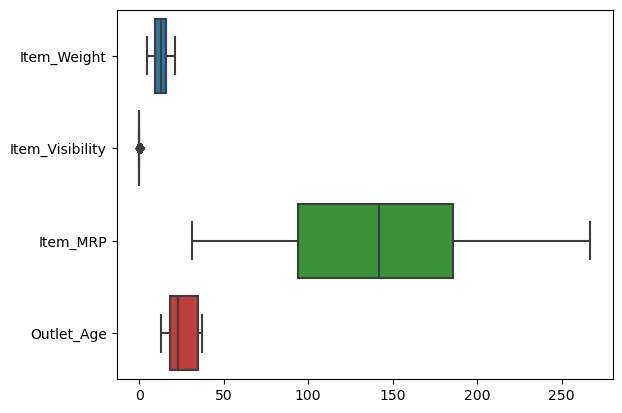

In [50]:
sns.boxplot(numcols,orient="h")

In [51]:
numcols['Item_Outlet_Sales']=objcols.Item_Outlet_Sales

#### Categorical variables are converted into dummy variables using pd.get_dummies().
#### This creates binary variables for each category, and the drop_first=True argument drops the first level to avoid multicollinearity.

In [52]:
objcols=objcols.drop(['Item_Identifier','Item_Outlet_Sales'],axis=1)

In [53]:
objcols_dummy=pd.get_dummies(objcols)

#### The scaled numeric variables and dummy variables are concatenated into a single dataframe called combinedf_clean for further analysis and modeling.

In [54]:
combinedf_clean=pd.concat([numcols,objcols_dummy],axis=1)

#### The combined dataframe is split back into the original train and test datasets. The target variable is removed from the test dataset as it will be predicted using the models.

In [55]:
salestrain_df=combinedf_clean[combinedf_clean.Item_Outlet_Sales!='test']
salestest_df=combinedf_clean[combinedf_clean.Item_Outlet_Sales=='test']

In [56]:
salestest_df=salestest_df.drop('Item_Outlet_Sales',axis=1)

#### The target variable (Item_Outlet_Sales) is separated from the features (X).
#### The target variable is converted to the appropriate data type (float64) for modeling.

In [57]:
y=salestrain_df.Item_Outlet_Sales
X=salestrain_df.drop('Item_Outlet_Sales',axis=1)

In [58]:
y=y.astype('float64')

## Various regression models (Linear Regression, Decision Tree, Random Forest, Support Vector Machine, K-Nearest Neighbors, Gradient Boosting, XGBoost, LightGBM, CatBoost) are trained using the training data (X and y).

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
reg=LinearRegression()

In [61]:
regmodel=reg.fit(X,y)

In [62]:
regmodel.score(X,y)

0.5637737001510252

### Predictions are made using the trained regression model for the test dataset.

In [63]:
regtestpredict = regmodel.predict(salestest_df)

In [64]:
# Replace negative predictions with zero
regtestpredict = np.where(regtestpredict < 0, 0, regtestpredict)

In [65]:
reg_output = pd.DataFrame({
    'Item_Identifier': salestest['Item_Identifier'],
    'Outlet_Identifier': salestest['Outlet_Identifier'],
    'Item_Outlet_Sales': regtestpredict
})

In [66]:
reg_output.to_csv("reg_output.csv", index=False)

In [67]:
from sklearn.metrics import r2_score

In [69]:
from sklearn.tree import DecisionTreeRegressor

In [70]:
tree=DecisionTreeRegressor(max_depth=8)

In [71]:
treemodel=tree.fit(X,y)

In [72]:
treemodel.score(X,y)

0.6358506446270598

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
cross_val_score(tree,X,y)

array([0.57409211, 0.54903663, 0.54133621, 0.5705381 , 0.58862388])

In [75]:
treetestpred=treemodel.predict(salestest_df)

In [76]:
treetestpred = treemodel.predict(salestest_df)

In [77]:
treetestpred = np.where(treetestpred < 0, 0, treetestpred)

In [78]:
tree_output = pd.DataFrame({
    'Item_Identifier': salestest['Item_Identifier'],
    'Outlet_Identifier': salestest['Outlet_Identifier'],
    'Item_Outlet_Sales': treetestpred
})

In [79]:
tree_output.to_csv("tree_output.csv", index=False)

In [80]:
pd.DataFrame(treetestpred).to_csv("tree.csv")

In [81]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
RF=RandomForestRegressor(n_estimators=5000,max_depth=8)

In [83]:
RFmodel=RF.fit(X,y)

In [84]:
RFmodel.score(X,y)

0.6557977567983289

In [85]:
RFtestpredict=RFmodel.predict(salestest_df)

In [86]:
RFtestpredict = RFmodel.predict(salestest_df)

In [87]:
# Replace negative predictions with zero
RFtestpredict = np.where(RFtestpredict < 0, 0, RFtestpredict)

In [88]:
RF_output = pd.DataFrame({
    'Item_Identifier': salestest['Item_Identifier'],
    'Outlet_Identifier': salestest['Outlet_Identifier'],
    'Item_Outlet_Sales': RFtestpredict
})

In [89]:
RF_output.to_csv("RF_output.csv", index=False)

In [92]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')  
svr.fit(X, y)
predictions = svr.predict(salestest_df)


In [93]:
svr_predictions = np.where(predictions < 0, 0, predictions)

In [136]:
svr_output = pd.DataFrame({
    'Item_Identifier': salestest['Item_Identifier'],
    'Outlet_Identifier': salestest['Outlet_Identifier'],
    'Item_Outlet_Sales': svr_predictions
})

In [137]:
r2_svr=svr.score(X,y)
print("R-squared score for Support Vector Machine (SVR):", r2_svr)

R-squared score for Support Vector Machine (SVR): 0.2070414208456275


In [95]:
svr_output.to_csv("svr_output.csv", index=False)

In [96]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)  
knn.fit(X, y)
knn_predictions = knn.predict(salestest_df)


In [97]:
knn_predictions = np.where(predictions < 0, 0, knn_predictions)

In [98]:
knn_output = pd.DataFrame({
    'Item_Identifier': salestest['Item_Identifier'],
    'Outlet_Identifier': salestest['Outlet_Identifier'],
    'Item_Outlet_Sales': knn_predictions
})

In [130]:
r2_knn=knn.score(X,y)
print("R-squared score for K-Nearest Neighbors (KNN):", r2_knn)

R-squared score for K-Nearest Neighbors (KNN): 0.6582467736709691


In [99]:
knn_output.to_csv("knn_output.csv", index=False)

In [100]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gbr.fit(X, y)
gbr_predictions = gbr.predict(salestest_df)


In [101]:
gbr_predictions = np.where(gbr_predictions < 0, 0, gbr_predictions)

In [102]:
gbr_output = pd.DataFrame({
    'Item_Identifier': salestest['Item_Identifier'],
    'Outlet_Identifier': salestest['Outlet_Identifier'],
    'Item_Outlet_Sales': gbr_predictions
})

In [131]:
r2_gbr=gbr.score(X,y)
print("R-squared score for Gradient Boosting Regressor:", r2_gbr)

R-squared score for Gradient Boosting Regressor: 0.6280203763593082


In [103]:
gbr_output.to_csv("gbr_output.csv", index=False)

In [104]:
import xgboost as xgb

In [105]:
XGB = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
XGB.fit(X, y)
XGB_predictions = XGB.predict(salestest_df)

In [106]:
XGB_predictions = np.where(XGB_predictions < 0, 0, XGB_predictions)

In [107]:
gbr_output = pd.DataFrame({
    'Item_Identifier': salestest['Item_Identifier'],
    'Outlet_Identifier': salestest['Outlet_Identifier'],
    'Item_Outlet_Sales': XGB_predictions
})

In [132]:
r2_XGB=XGB.score(X,y)
print("R-squared score for XGBoost Regressor:", r2_XGB)

R-squared score for XGBoost Regressor: 0.6281875842551317


In [108]:
gbr_output.to_csv("XGB_predictions.csv", index=False)

In [109]:
import lightgbm as lgb

In [110]:
LGB = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
LGB.fit(X, y)
LGB_predictions = LGB.predict(salestest_df)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000497 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 833
[LightGBM] [Info] Number of data points in the train set: 8523, number of used features: 46
[LightGBM] [Info] Start training from score 2181.288915
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [111]:
LGB_predictions = np.where(LGB_predictions < 0, 0, LGB_predictions)

In [112]:
gbr_output = pd.DataFrame({
    'Item_Identifier': salestest['Item_Identifier'],
    'Outlet_Identifier': salestest['Outlet_Identifier'],
    'Item_Outlet_Sales': LGB_predictions
})

In [133]:
r2_LGB=LGB.score(X,y)
print("R-squared score for LightGBM Regressor:", r2_LGB)

R-squared score for LightGBM Regressor: 0.6234227858560832


In [113]:
gbr_output.to_csv("LGB_predictions.csv", index=False)

In [114]:
from catboost import CatBoostRegressor

CatBoost = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=3, loss_function='RMSE')
CatBoost.fit(X, y)
CatBoost_predictions = CatBoost.predict(salestest_df)


0:	learn: 1623.0323663	total: 139ms	remaining: 13.7s
1:	learn: 1552.3963520	total: 140ms	remaining: 6.87s
2:	learn: 1491.0717772	total: 142ms	remaining: 4.58s
3:	learn: 1437.8557161	total: 143ms	remaining: 3.43s
4:	learn: 1391.4350251	total: 144ms	remaining: 2.74s
5:	learn: 1352.5442097	total: 145ms	remaining: 2.28s
6:	learn: 1315.0319306	total: 147ms	remaining: 1.95s
7:	learn: 1285.3407799	total: 148ms	remaining: 1.7s
8:	learn: 1260.0482402	total: 149ms	remaining: 1.51s
9:	learn: 1237.7555740	total: 151ms	remaining: 1.36s
10:	learn: 1217.4521572	total: 152ms	remaining: 1.23s
11:	learn: 1197.9398441	total: 154ms	remaining: 1.13s
12:	learn: 1180.6532545	total: 156ms	remaining: 1.04s
13:	learn: 1167.7049822	total: 157ms	remaining: 965ms
14:	learn: 1156.0734996	total: 159ms	remaining: 899ms
15:	learn: 1145.6509238	total: 160ms	remaining: 842ms
16:	learn: 1137.0810906	total: 162ms	remaining: 790ms
17:	learn: 1129.8187362	total: 163ms	remaining: 744ms
18:	learn: 1123.0373498	total: 165ms	re

In [115]:
CatBoost_predictions = np.where(CatBoost_predictions < 0, 0, CatBoost_predictions)

In [116]:
gbr_output = pd.DataFrame({
    'Item_Identifier': salestest['Item_Identifier'],
    'Outlet_Identifier': salestest['Outlet_Identifier'],
    'Item_Outlet_Sales': CatBoost_predictions
})

In [134]:
r2_CatBoost=CatBoost.score(X,y)
print("R-squared score for CatBoost Regressor:", r2_CatBoost)

R-squared score for CatBoost Regressor: 0.6128842363836648


In [117]:
gbr_output.to_csv("CatBoost_predictions.csv", index=False)